# Booter Blacklist - Monitoring use cases

Booters are Internet services that offers to their customers the ability to launch DDoS attacks on a target of their choice. The name refers to their ability to ‘boot’ the target off of the Internet. They are also referred to as ‘DDoS-for-hire’, ‘DDoS-as-a-Service’, and ‘network stressers’. Booters differ from previous methods of launching DDoS attacks due to two new characteristics: the ease with which any individual can now launch a powerful DDoS attack, and the involvement of a third party, the Booter owner/operator, who provides the infrastructure necessary to perform a DDoS attack as a ‘for-hire’ service available to anyone.

## Why to monitor the access to Booters?

It is known that the number of attacks performed by Booters is non-stop increasing. Then, you ask yourself: how many are they? and which users are accessing Booters and pottentially are launching attacks from my network? To answer these and other questions we developed the Booter blacklist and made available at http://booterblacklist.com. Our main intention is (1) to mitigate the access of Booter customers by notifying them about the implications of Booter usage, (2) create evidences to prossecute responsible for attacks and (3) mitigate the overall phenomenon. Please consider the scenario depicted bellow: 

![Best scenario](figs/bbl_usage.png?raw=true) 

In this scenario, an user of your network access a Booter and a couple of minutes later you observe a DDoS attack (against a third user of your network). Although (you would say that) "this is not likely to happen", we have found (at SURFnet) many cases that this was exactly the case.

We **DO NOT** recomend the use the Booter blacklist to **BLOCK** users but inseady notify them that they are trying to access a service that can potentially harm other services in the Internet (and of course monitor them). 

## About this Notebook and the SURFnet use case 

This document is a [Jupyter Notebook](http://jupyter.org/) containing the dynamic analysis of data provided on weekly basis by the the Dutch National Research and Education Network, called SURFnet. This is an (ongoing) collaboration between the University of Twente and SURFnet. Since march 2015, SURFnet is using our Booters blacklist (constantly updated and openly shared at http://booterblacklist.com) to monitor the access to Booters. They monitor DNS queries using their EEMO plugin https://github.com/SURFnet/eemo. Before SURFnet sends any data to us they anonymize the information of their clients using a code similar to the one available at https://github.com/jjsantanna/IP_anonymization_by_Roland. 
![University of twente](figs/utwente.png?raw=true)
![SURFnet](figs/surfnet.png?raw=true) 

# WANT TO JOIN US? Detailed information in the end of this notebook.

<h2>The content of this Notebook is the following:</h2>

<div id="TOC">
    <ul>
    <li><a href="#1">1. Preamble & Pre-analysis</a></li>
        <ul>
        <li><a href="#1.1">1.1. Which libraries we use to analyse the data?</a></li>
        <li><a href="#1.2">1.2. How SURFnet data looks like? [loding the raw data]</a></li>
        <li><a href="#1.3">1.3. What should be formated/fix/added to facilitate our analisis? </a></li>
        <li><a href="#1.4">1.4. What are the outliers that should be removed from the analysis? (in a first moment)</a></li>
        <li><a href="#1.5">1.5. How do we define the NEW data frame (excluding the outlier)</a></li>
        <li><a href="#1.6">1.6. How many different record types are there in the (remaining) data frame? and removing the outlier client?</a></li> 
        <li><a href="#1.7">1.7. What is the first, the last record, and the time window of the data?</a></li>
        </ul>
    <li><a href="#2">2. The analysis</a></li>
        <ul>
        <li><a href="#2.0.1">Defining 4-months periods</a></li>
        <li><a href="#2.1">2.1. Booters analysis</a></li>
            <ul>
            <li><a href="#2.1.1">2.1.1. How many distinct Booters were accessed by users in total? in Q1, Q2 and Q3?</a></li>
            <li><a href="#2.1.2">2.1.2. What is distribution of the number of access to Booters?</a></li>
            <li><a href="#2.1.3">2.1.3. What are the most accessed Booters? and for each 4-months period?</a></li>
            <li><a href="#2.1.4">2.1.4. What are the medians of access to the most accessed Booters?</a></li>
            </ul>
        <li><a href="#2.2.">2.2. Users Analysis</a></li>
            <ul>
            <li><a href="#2.2.1.">2.2.1. How many users are in the data?</a></li>
            <li><a href="#2.2.2.">2.2.2. What is the cumulative distribution of the requests per users?</a></li>
            <li><a href="#2.2.3.">2.2.3. Which are the top10 clients?and how many times each top10 client request for a Booter?</a></li>
            <li><a href="#2.2.4.">2.2.4. How many accesses to Booters each top 10 client performed? How is the overall distribution of access to different Booters each client performed?</a></li>
            <li><a href="#2.2.5">2.2.5. What are the medians of access to the most accessed Booters?</a></li>
            </ul>
        </ul>
    <li><a href="#3">3.  What happened in the last week?</a></li>
    <li><a href="#4">WANT TO JOIN US?</a></li>
    </ul>
</div>

<div id="1"><h1><a href="#TOC">1. Preamble & Pre-analysis</a></h1></div>

<div id="1.1"><h2><a href="#TOC">1.1. Which libraries we use to analyse the data?</a></h2></div>

In [2]:
# CODE:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid.inset_locator import inset_axes

from itertools import cycle, islice

import warnings
warnings.filterwarnings('ignore')

# import plotly
# plotly.offline.init_notebook_mode()

In [3]:
# CODE
lines = ['-']
mylines = list(islice(cycle(lines), None, 50))

markers = ['o', ',', '*','h','p', 'D','H','v','^','<', '>']
mymarkers = list(islice(cycle(markers), None, 50))


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

mystyle=[]
for c in colors:
    for m in markers:
        for l in lines:
            mystyle.append(c+l+m)

from random import shuffle
shuffle(mystyle)

mystyle=list(islice(cycle(mystyle), None, 50))

# my old style bellow
# mystyle = list(islice(cycle(['s-','ro-','y^-','c*-','r-o', 'g--^', 'b:*', 'm-.D', 'k:o']), None, 28))

#This is the color template that I use. For more information https://personal.sron.nl/~pault/colourschemes.pdf
mycolors4 = list(islice(cycle(['#4477AA','#117733','#DDCC77','#CC6677']), None, 4)) # we can change the '4' len(df that you want plot)
mycolors12 = list(islice(cycle(['#332288','#6699CC','#88CCEE','#44AA99','#117733','#999933','#DDCC77','#661100','#CC6677','#AA4466','#882255','#AA4499']), None, 12))

<div id="1.2"><h2><a href="#TOC">1.2. How the data looks like? [loding the raw data]</a></h2></div>

In [4]:
# CODE:

# Loading the data. In pandas a dataset is loaded as "data frame" for this reason we use the acronym "df"
# We also skipp the lines that have more columns than expected ( we just need this 6 columns)
df0 = pd.read_csv('../anon_booters.txt.gz', error_bad_lines=False, sep=',',\
                  names = ['timestamp', 'recordtype', 'client', 'in','querytype','value'])

# Presenting the first 10 lines
df0.head(10)

,timestamp,recordtype,client,in,querytype,value
0,1434735481,Q(Q),c861aaa8307395e94c0bc1d88e9846ff1680712521986...,IN,A,quezstresser.com.
1,1434735481,Q(R),c861aaa8307395e94c0bc1d88e9846ff1680712521986...,IN,A,quezstresser.com.
2,1434735481,R(ANS),c861aaa8307395e94c0bc1d88e9846ff1680712521986...,IN,A,185.62.190.40
3,1434737327,Q(Q),209cd9935519df117524240334f11c3ec3ee5d9932ffb...,IN,A,booter.xyz.
4,1434737327,Q(R),209cd9935519df117524240334f11c3ec3ee5d9932ffb...,IN,A,booter.xyz.
5,1434737327,R(ANS),209cd9935519df117524240334f11c3ec3ee5d9932ffb...,IN,A,104.28.26.6
6,1434737327,R(ANS),209cd9935519df117524240334f11c3ec3ee5d9932ffb...,IN,A,104.28.27.6
7,1434737327,R(ADD),209cd9935519df117524240334f11c3ec3ee5d9932ffb...,UNSPECIFIED,UNSPECIFIED,EDNS version 0
8,1434738950,Q(Q),c861aaa8307395e94c0bc1d88e9846ff1680712521986...,IN,A,quezstresser.com.
9,1434738950,Q(R),c861aaa8307395e94c0bc1d88e9846ff1680712521986...,IN,A,quezstresser.com.


<div id="1.3"><h2><a href="#TOC">1.3. What should be formated/fix/added to facilitate our analisis?</a></h2></div>

In [5]:
# CODE:

# Converting the collumn 'value' to lower case and remove 'www' because, 
# for example,"www.booter.xyz." is the same as "booter.xyz"

df0['value'] = map(lambda x: x.lower().replace('www.','',-1), df0['value'])

# Converting epoch timestamp into date.
df0['timestamp'] = pd.to_datetime(df0['timestamp'],unit='s')

# Adding a column with 1's
df0['unit'] = 1 

<div id="1.4"><h2><a href="#TOC">1.4. What are the outliers that should be *removed from the analysis?</a></h2></div>

In [6]:
# CODE:
df0[df0['recordtype']==' Q(Q)']['client'].value_counts()[0:10]

 b8f093c23ba0c6f5df242e935218578262309846e7f45ad6fc8dc4c69eb23ee1    5010
 a3a7b240646f706162ecce4e4f762288f400905b872d362bcf7c32f336208e6e    1648
 561e20341386f1b637011983cd6b800e4e77496fd22c14843bfe8521706e68ad    1064
 7b4f45b838b71c0b422ac872c22b31650d8a8765afcc003b8b3b6ca5b2cbed55    1016
 18f9eec93778aa08e31a56b1f416f0d8704db9a56d36f3eebefeac80c7cb2cc5     742
 8acd6af477c9b86d6ef54ee4dbf9a4910396bc7c9ad64d4c22b89e77626bf72a     590
 6936a119cf12e9551e0f08ba9e71750108f4807cc522fbb23de6b6240e07eb38     454
 0f972ef7b4abd26a505e0d0aa8d997f01a9ac75a5a4b0f8ec31852fd8979e74e     398
 3d871e5389b8434ca72af572b8885e3c9104897cb7ce0f5d5623e4c6bdcac15f     371
 7f79658a9cc4e7e34f0c8ca40de8bfa2f76fa33f6653df351da3325c9e3c8781     370
Name: client, dtype: int64

- The first client identified by 'b8f093c23ba0c6f5df242e935218578262309846e7f45ad6fc8dc4c69eb23ee1' is clearly an outlier. By talking with our SURFnet they disclosured that such client is a TOR exit node. They also provide the identifier of a second exit node: '4fcc1341c071b5b7e0159696766868fbb63728e7db978c153ccc47df386410c1'. Although we analyse the behaviour of both clients in the end of this notebook, we remove then from the main analysis of the dataset.

<div id="1.5"><h2><a href="#TOC">1.5. Defining the NEW data frame (excluding the outlier)</a></h2></div>   

In [7]:
# CODE:
df = df0[(df0['client']!=' b8f093c23ba0c6f5df242e935218578262309846e7f45ad6fc8dc4c69eb23ee1') & \
         (df0['client']!=' 4fcc1341c071b5b7e0159696766868fbb63728e7db978c153ccc47df386410c1')]

<div id="1.6"><h2><a href="#TOC">1.6. How many different record types are there in the (remaining) data frame? and removing the outlier client?</a></h2></div>

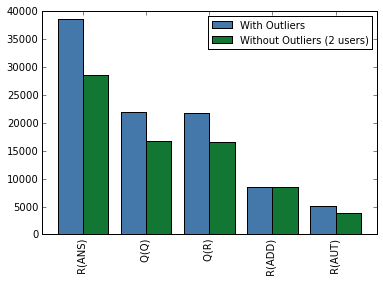

In [8]:
# CODE:
records_withoutliers= df0['recordtype'].value_counts()
records_withoutoutliers=df['recordtype'].value_counts()

merged = pd.concat([records_withoutliers,records_withoutoutliers], axis=1)
merged.columns = ['With Outliers','Without Outliers (2 users)']
merged_sorted = merged.sort_values(['With Outliers','Without Outliers (2 users)'], ascending=[False,True])

# Plotting
fig = plt.figure()
ax = merged_sorted.plot.bar(color=mycolors4,width = .8)
ax.legend(prop={'size':10})

fig.show()

<div id="1.7"><h2><a href="#TOC">1.7. What is the first, the last record and the time span of the data?</a></h2></div>

In [9]:
# CODE:
first_record=df['timestamp'].head(1).values[0]
last_record=df['timestamp'].tail(1).values[0]

day_span=(last_record-first_record).astype('timedelta64[D]')

first_record,last_record,day_span

(numpy.datetime64('2015-06-19T17:38:01.000000000'),
 numpy.datetime64('2016-08-05T05:32:36.000000000'),
 numpy.timedelta64(412,'D'))

<div id="2"><h1><a href="#TOC">2. The analysis</a></h1></div>

<div id="2.0.1"><h2><a href="#TOC">Defining 4-months periods</a></h2></div>

In [11]:
# CODE:
# Q1 = January, February and March
# Q2 = April, May and June
# Q3 = July, August and September 
# Q4 = October, November and December

indexed_df = df.set_index(['timestamp'])

df_q1=indexed_df['2015-06-01':'2015-09-30']
df_q2=indexed_df['2015-10-01':'2016-01-31']
df_q3=indexed_df['2016-02-01':]



<div id="2.1"><h1><a href="#TOC">2.1. Booters analysis</a></h1></div>

<div id="2.1.1"><h2><a href="#TOC">2.1.1. How many distinct Booters were accessed by users in total? in Q1, Q2 and Q3?</a></h2></div>


In [12]:
# CODE:
total_booters_outliers=len(df0[df0['recordtype']==' Q(Q)']['value'].value_counts())

total_booters=len(df[df['recordtype']==' Q(Q)']['value'].value_counts())
booters_q1=len(df_q1[df_q1['recordtype']==' Q(Q)']['value'].value_counts())
booters_q2=len(df_q2[df_q2['recordtype']==' Q(Q)']['value'].value_counts())
booters_q3=len(df_q3[df_q3['recordtype']==' Q(Q)']['value'].value_counts())

# Printing
total_booters_outliers,total_booters,booters_q1,booters_q2,booters_q3

(235, 197, 108, 120, 104)

- Looks like that the outliers (that are the TOR nodes) accessed 34 Booters never accessed by the other 'normal' users. 

<div id="2.1.2"><h2><a href="#TOC">2.1.2. What is distribution of the number of access to Booters?</a></h2></div>

In [13]:
# CODE:
serie = df['value'][df['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist = np.linspace(0.,1.,len(serie))
cdf = pd.Series(cum_dist, index=serie)

serie_q1 = df_q1['value'][df_q1['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q1 = np.linspace(0.,1.,len(serie_q1))
cdf_q1 = pd.Series(cum_dist_q1, index=serie_q1)

serie_q2 = df_q2['value'][df_q2['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q2 = np.linspace(0.,1.,len(serie_q2))
cdf_q2 = pd.Series(cum_dist_q2, index=serie_q2)

serie_q3 = df_q3['value'][df_q3['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q3 = np.linspace(0.,1.,len(serie_q3))
cdf_q3 = pd.Series(cum_dist_q3, index=serie_q3)

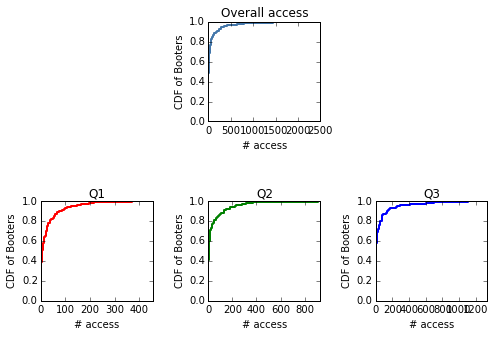

In [14]:
# CODE:
# Plot
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.8,wspace=0.5)

ax1 = plt.subplot2grid((2,3), (0,1))
cdf.plot(lw=2, ax=ax1, drawstyle='steps',color='#4477aa', title="Overall access")
ax1.set_xlabel("# access")
ax1.set_ylabel("CDF of Booters")

ax2 = plt.subplot2grid((2,3), (1,0))
cdf_q1.plot(lw=2, drawstyle='steps',color='r', title="Q1")
ax2.set_xlabel("# access")
ax2.set_ylabel("CDF of Booters")

ax3 = plt.subplot2grid((2,3), (1,1))
cdf_q2.plot(lw=2, drawstyle='steps',color='g', title="Q2")
ax3.set_xlabel("# access")
ax3.set_ylabel("CDF of Booters")

ax4 = plt.subplot2grid((2,3), (1,2))
cdf_q3.plot(lw=2, drawstyle='steps',color='b', title="Q3")
ax4.set_xlabel("# access")
ax4.set_ylabel("CDF of Booters")

fig.show()

#plotly.offline.iplot_mpl(fig)


<div id="2.1.3"><h2><a href="#TOC">2.1.3. What are the most accessed Booters? and for each 4-months period?</a></h2></div>

In [15]:
# CODE:
top10booters_count = df['value'][df['recordtype']==' Q(Q)'].value_counts()[:10]
top10booters=top10booters_count.index.tolist()

top10booters_q1_count = df_q1['value'][df_q1['recordtype']==' Q(Q)'] .value_counts()[:10]
top10booters_q1=top10booters_q1_count.index.tolist()

top10booters_q2_count = df_q2['value'][df_q2['recordtype']==' Q(Q)'].value_counts()[:10]
top10booters_q2=top10booters_q2_count.index.tolist()

top10booters_q3_count = df_q3['value'][df_q3['recordtype']==' Q(Q)'] .value_counts()[:10]
top10booters_q3=top10booters_q3_count.index.tolist()

q1=pd.DataFrame(top10booters_q1)
q2=pd.DataFrame(top10booters_q2)
q3=pd.DataFrame(top10booters_q3)
alltop10=list(pd.concat([q1,q2,q3]).drop_duplicates().values.flatten())

booters_perweek = pd.pivot_table(df[df['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='7D'), \
                    columns='value', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

booters_permonth = pd.pivot_table(df[df['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='1M'), \
                    columns='value', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

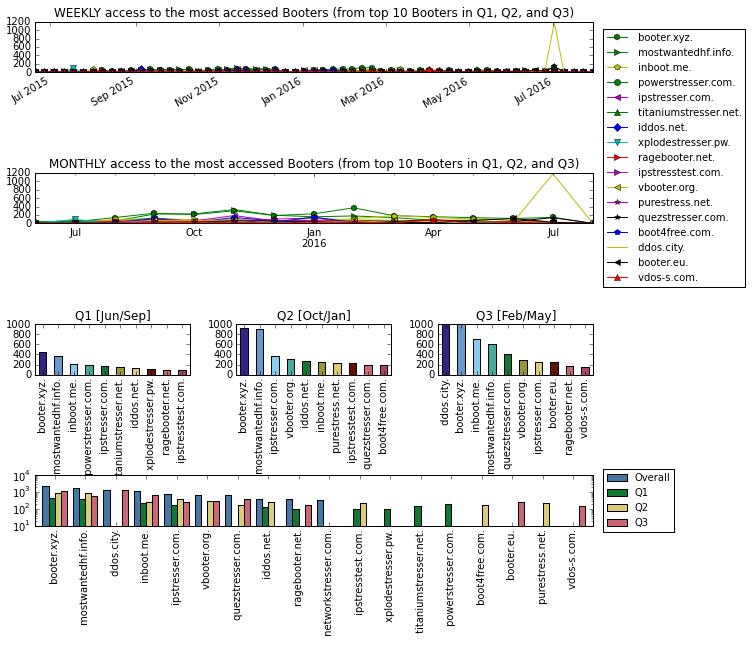

In [16]:
# CODE:
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=2,wspace=0.3)

ax1 = plt.subplot2grid((4,3), (0,0), colspan=3)
booters_perweek[alltop10].plot(ax=ax1,style=mystyle, title="WEEKLY access to the most accessed Booters (from top 10 Booters in Q1, Q2, and Q3)", legend=False)
ax1.legend(loc='center left',prop={'size':10},bbox_to_anchor=(1.01, -1.7),numpoints=1)
ax1.set_xlabel("")

ax2 = plt.subplot2grid((4,3), (1,0), colspan=3)
booters_permonth[alltop10].plot(ax=ax2,style=mystyle, title="MONTHLY access to the most accessed Booters (from top 10 Booters in Q1, Q2, and Q3)", legend=False)
ax2.set_xlabel("")

ax3 = plt.subplot2grid((4,3), (2,0))
top10booters_q1_count.plot.bar(color=mycolors12,ax=ax3, title="Q1 [Jun/Sep]",ylim=(0,1000))

ax4 = plt.subplot2grid((4,3), (2,1))
top10booters_q2_count.plot.bar(color=mycolors12,ax=ax4, title="Q2 [Oct/Jan]")

ax5 = plt.subplot2grid((4,3), (2,2))
top10booters_q3_count.plot.bar(color=mycolors12,ax=ax5, title="Q3 [Feb/May]",ylim=(0,1000))

ax6 = plt.subplot2grid((4,3), (3,0), colspan=3)
merged = pd.concat([top10booters_count, top10booters_q1_count,top10booters_q2_count,top10booters_q3_count], axis=1)
merged.columns = ['Overall','Q1', 'Q2','Q3']
merged.sort_values(['Overall','Q1'], ascending=[False,True]).plot.bar(color=mycolors4,ax=ax6,logy=True,width = .8)
ax6.legend(loc='center left',prop={'size':10},bbox_to_anchor=(1.01, 0.5),numpoints=1)

# fig.savefig('~/Desktop/booters_per_quarter.eps', bbox_inches='tight',format='eps', dpi=1200)

<div id="2.1.4"><h2><a href="#TOC">2.1.4. What are the medians of access to the most accessed Booters?</a></h2></div>

In [17]:
# CODE:
medians = pd.concat([booters_perweek[alltop10].median(),booters_permonth[alltop10].median()], axis=1)
medians.columns = ['Weekly','Monthly']
medians.sort_values(['Monthly','Weekly'], ascending=[False,True])

,Weekly,Monthly
value,,
booter.xyz.,41.0,158.0
mostwantedhf.info.,27.0,116.0
inboot.me.,17.0,91.0
ipstresser.com.,10.0,57.0
vbooter.org.,10.0,49.0
quezstresser.com.,7.0,39.0
ragebooter.net.,4.0,26.0
ddos.city.,3.0,17.0
boot4free.com.,1.0,12.0


<div id="2.2."><h1><a href="#TOC">2.2. Users Analysis</a></h1></div>

<div id="2.2.1."><h2><a href="#TOC">2.2.1. How many users are in the data?</a></h2></div>

In [18]:
# CODE:
total_users_outliers=len(df0[df0['recordtype']==' Q(Q)']['client'].value_counts())

total_users=len(df[df['recordtype']==' Q(Q)']['client'].value_counts())
users_q1=len(df_q1[df_q1['recordtype']==' Q(Q)']['client'].value_counts())
users_q2=len(df_q2[df_q2['recordtype']==' Q(Q)']['client'].value_counts())
users_q3=len(df_q3[df_q3['recordtype']==' Q(Q)']['client'].value_counts())

# Printing
total_users_outliers,total_users,users_q1,users_q2,users_q3

(470, 468, 180, 245, 233)

<div id="2.2.2."><h2><a href="#TOC">2.2.2. What is the cumulative distribution of the requests per users?</a></h2></div>

In [19]:
# CODE:
serie = df['client'][df['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist = np.linspace(0.,1.,len(serie))
cdf = pd.Series(cum_dist, index=serie)

serie_q1 = df_q1['client'][df_q1['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q1 = np.linspace(0.,1.,len(serie_q1))
cdf_q1 = pd.Series(cum_dist_q1, index=serie_q1)

serie_q2 = df_q2['client'][df_q2['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q2 = np.linspace(0.,1.,len(serie_q2))
cdf_q2 = pd.Series(cum_dist_q2, index=serie_q2)

serie_q3 = df_q3['client'][df_q3['recordtype']==' Q(Q)'].value_counts().sort_values()
cum_dist_q3 = np.linspace(0.,1.,len(serie_q3))
cdf_q3 = pd.Series(cum_dist_q3, index=serie_q3)

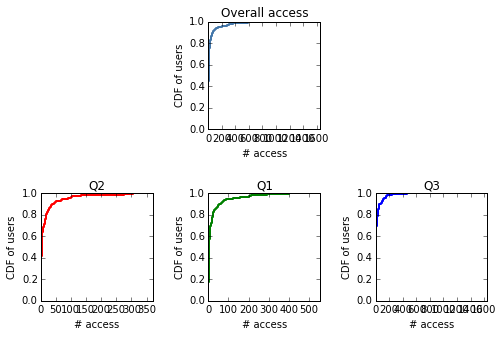

In [20]:
# CODE:

# Plot
fig = plt.figure(figsize=(8, 5))
fig.subplots_adjust(hspace=0.6,wspace=0.5)

ax1 = plt.subplot2grid((2,3), (0,1))
cdf.plot(lw=2, ax=ax1, drawstyle='steps',color='#4477aa', title="Overall access")
ax1.set_xlabel("# access")
ax1.set_ylabel("CDF of users")

ax2 = plt.subplot2grid((2,3), (1,0))
cdf_q1.plot(lw=2, drawstyle='steps',color='r', title="Q2")
ax2.set_xlabel("# access")
ax2.set_ylabel("CDF of users")

ax3 = plt.subplot2grid((2,3), (1,1))
cdf_q2.plot(lw=2, drawstyle='steps',color='g', title="Q1")
ax3.set_xlabel("# access")
ax3.set_ylabel("CDF of users")

ax4 = plt.subplot2grid((2,3), (1,2))
cdf_q3.plot(lw=2, drawstyle='steps',color='b', title="Q3")
ax4.set_xlabel("# access")
ax4.set_ylabel("CDF of users")

fig.show()
#plotly.offline.iplot_mpl(fig )

<div id="2.2.3."><h2><a href="#TOC">2.2.3. Which are the top10 clients?and how many times each top10 client request for a Booter?</a></h2></div>

In [21]:
# CODE:

top10users_count = df['client'][df['recordtype']==' Q(Q)'].value_counts()[:10]
top10users=top10users_count.index.tolist()

top10users_q1_count = df_q1['client'][df_q1['recordtype']==' Q(Q)'] .value_counts()[:10]
top10users_q1=top10users_q1_count.index.tolist()

top10users_q2_count = df_q2['client'][df_q2['recordtype']==' Q(Q)'].value_counts()[:10]
top10users_q2=top10users_q2_count.index.tolist()

top10users_q3_count = df_q3['client'][df_q3['recordtype']==' Q(Q)'] .value_counts()[:10]
top10users_q3=top10users_q3_count.index.tolist()

q1=pd.DataFrame(top10users_q1)
q2=pd.DataFrame(top10users_q2)
q3=pd.DataFrame(top10users_q3)
alltop10=list(pd.concat([q1,q2,q3]).drop_duplicates().values.flatten())

users_perweek = pd.pivot_table(df[df['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='7D'), \
                    columns='client', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

users_permonth = pd.pivot_table(df[df['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='1M'), \
                    columns='client', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

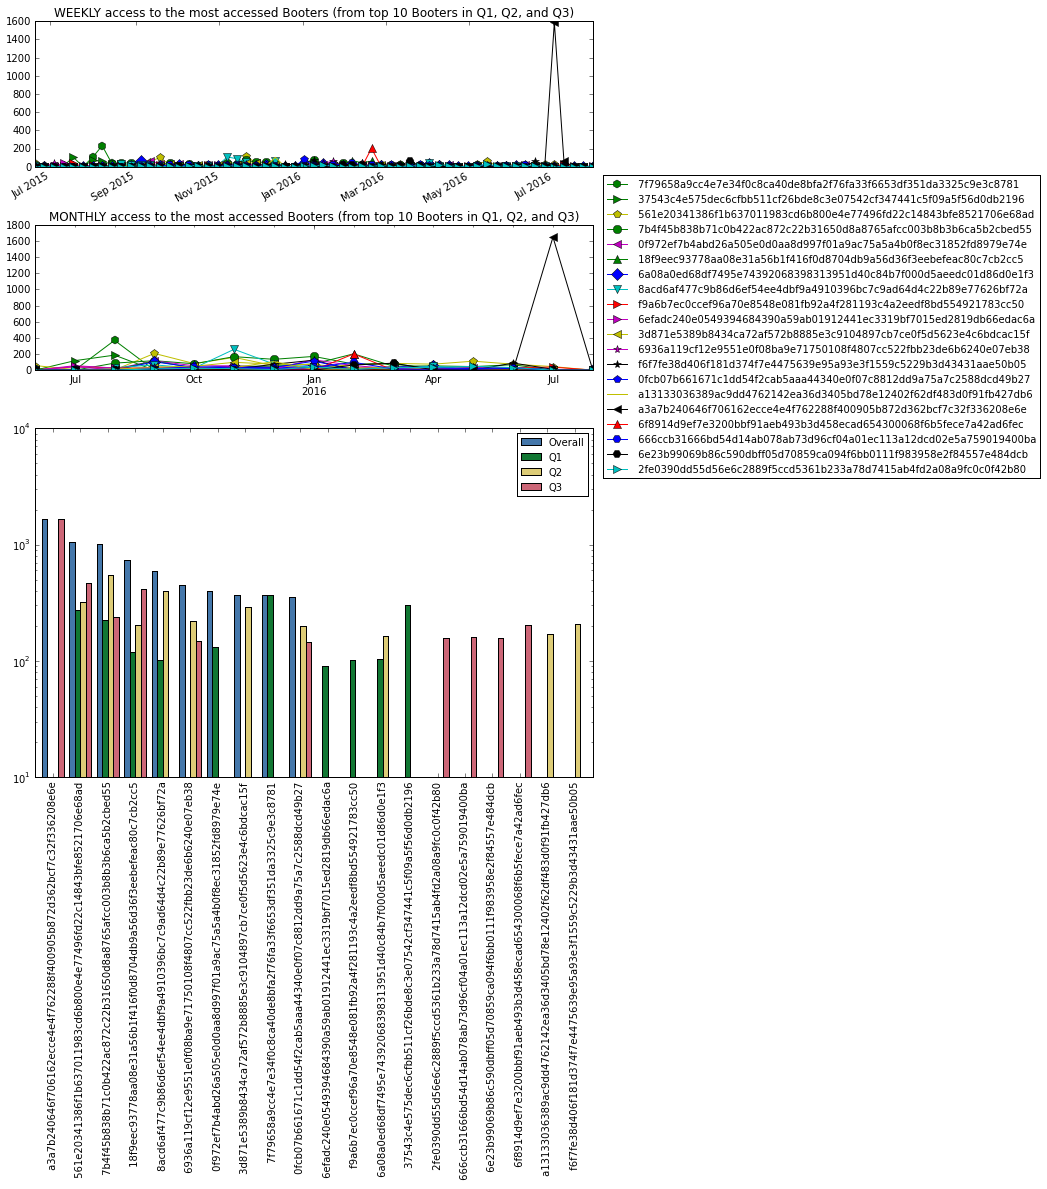

In [22]:
# CODE:

fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(hspace=0.4,wspace=0.3)

ax1 = plt.subplot2grid((4,3), (0,0), colspan=3)
users_perweek[alltop10].plot(ax=ax1,style=mystyle, title="WEEKLY access to the most accessed Booters (from top 10 Booters in Q1, Q2, and Q3)", markersize=8,legend=False)
ax1.legend(loc='center left',prop={'size':10},bbox_to_anchor=(1.01, -1.1),numpoints=1)
ax1.set_xlabel("")

ax2 = plt.subplot2grid((4,3), (1,0), colspan=3)
users_permonth[alltop10].plot(ax=ax2,style=mystyle, title="MONTHLY access to the most accessed Booters (from top 10 Booters in Q1, Q2, and Q3)", markersize=8,legend=False)
ax2.set_xlabel("")

# ax3 = plt.subplot2grid((4,3), (2,0))
# top10users_q1_count.plot.bar(color=mycolors12,ax=ax3, title="Q1 [Jun/Sep]",ylim=(0,1000))

# ax4 = plt.subplot2grid((4,3), (2,1))
# top10users_q2_count.plot.bar(color=mycolors12,ax=ax4, title="Q2 [Oct/Jan]")

# ax5 = plt.subplot2grid((4,3), (2,2))
# top10users_q3_count.plot.bar(color=mycolors12,ax=ax5, title="Q3 [Feb/May]",ylim=(0,1000))

ax6 = plt.subplot2grid((4,3), (2,0), colspan=3, rowspan=2) 
merged = pd.concat([top10users_count, top10users_q1_count,top10users_q2_count,top10users_q3_count], axis=1)
merged.columns = ['Overall','Q1', 'Q2','Q3']
merged.sort_values(['Overall','Q1'], ascending=[False,True]).plot.bar(color=mycolors4,ax=ax6,logy=True,width = .8)
ax6.legend(prop={'size':10})


<div id="2.2.4."><h2><a href="#TOC">2.2.4. How many accesses to Booters each top 10 client performed? How is the overall distribution of access to different Booters each client performed?</a></h2></div>

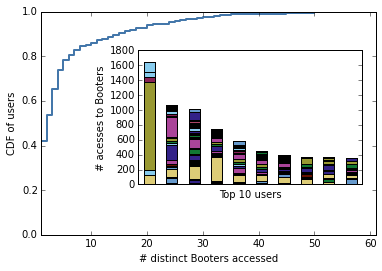

In [23]:
# CODE:

# DATA (for the main plot)
ser = df[df['recordtype']==' Q(Q)'].groupby(['client', 'value']).size().reset_index().groupby('client').count().ix[:,0].sort_values()
cum_dist = np.linspace(0.,1.,len(ser))
cdf = pd.Series(cum_dist, index=ser)

# PLOT (main)
fig = plt.figure()
ax = fig.add_subplot(111)
cdf.plot(lw=2,ax=ax,drawstyle='steps',color='#4477aa', title="").set_xlabel("")
ax.set_xlabel("# distinct Booters accessed")
ax.set_ylabel("CDF of users")

# DATA (for the subplot inside)
clients_permonth = pd.pivot_table(df[df['recordtype']==' Q(Q)'], index='client', columns='value', values='unit', aggfunc=np.sum, fill_value=0)

# PLOT 
box = ax.get_position()
fig2 = plt.gcf()
fig2.transFigure.inverted().transform(ax.transAxes.transform([0,0])) ##doesn't matter this numbers
x=0.35
y=0.3
width=box.width*0.67
height=box.height*0.6
ax1 = fig2.add_axes([x,y,width,height],axisbg='w') #x,y,width,height
clients_permonth.ix[top10users].plot(kind='bar',ax=ax1, stacked=True, legend=False, color=mycolors12, title="")
ax1.axes.get_xaxis().set_ticks([])
ax1.set_xlabel("Top 10 users")
ax1.set_ylabel("# acesses to Booters")
ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)

fig.show()
#fig.savefig('/Users/santannajj/Desktop/booters_accessed_top10users.eps', bbox_inches='tight',format='eps', dpi=1200)
#plotly.offline.iplot_mpl(fig )

<div id="2.2.5"><h2><a href="#TOC">2.2.5. What are the medians of access to the most accessed Booters?</a></h2></div>

In [24]:
# CODE:

medians = pd.concat([users_perweek[alltop10].median(),users_permonth[alltop10].median()], axis=1)
medians.columns = ['Weekly','Monthly']
medians.sort_values(['Monthly','Weekly'], ascending=[False,True])

,Weekly,Monthly
client,,
7b4f45b838b71c0b422ac872c22b31650d8a8765afcc003b8b3b6ca5b2cbed55,13.0,76.0
561e20341386f1b637011983cd6b800e4e77496fd22c14843bfe8521706e68ad,12.0,72.0
18f9eec93778aa08e31a56b1f416f0d8704db9a56d36f3eebefeac80c7cb2cc5,10.0,49.0
6936a119cf12e9551e0f08ba9e71750108f4807cc522fbb23de6b6240e07eb38,4.0,23.0
2fe0390dd55d56e6c2889f5ccd5361b233a78d7415ab4fd2a08a9fc0c0f42b80,2.0,17.0
8acd6af477c9b86d6ef54ee4dbf9a4910396bc7c9ad64d4c22b89e77626bf72a,3.0,17.0
6a08a0ed68df7495e74392068398313951d40c84b7f000d5aeedc01d86d0e1f3,0.0,16.0
a13133036389ac9dd4762142ea36d3405bd78e12402f62df483d0f91fb427db6,1.0,16.0
0f972ef7b4abd26a505e0d0aa8d997f01a9ac75a5a4b0f8ec31852fd8979e74e,2.0,16.0


<div id="3"><h1><a href="#TOC">3. What happened in the last week?</a></h1></div>

In [25]:
# CODE:

from datetime import date, timedelta
lastweek = date.today() - timedelta(days=7)

df_lastweek=indexed_df[lastweek:].reset_index()

booters_lastweek=len(df_lastweek[df_lastweek['recordtype']==' Q(Q)']['value'].value_counts())
users_lastweek=len(df_lastweek[df_lastweek['recordtype']==' Q(Q)']['client'].value_counts())

users_lastweek_sorted=df_lastweek[df_lastweek['recordtype']==' Q(Q)']['client'].value_counts().index.tolist()
print "In the last week (from "+str(lastweek)+" till "+str(date.today())+") "+str(users_lastweek)+" users accessed "+str(booters_lastweek)+" distinct Booters."

In the last week (from 2016-08-02 till 2016-08-09) 5 users accessed 5 distinct Booters.


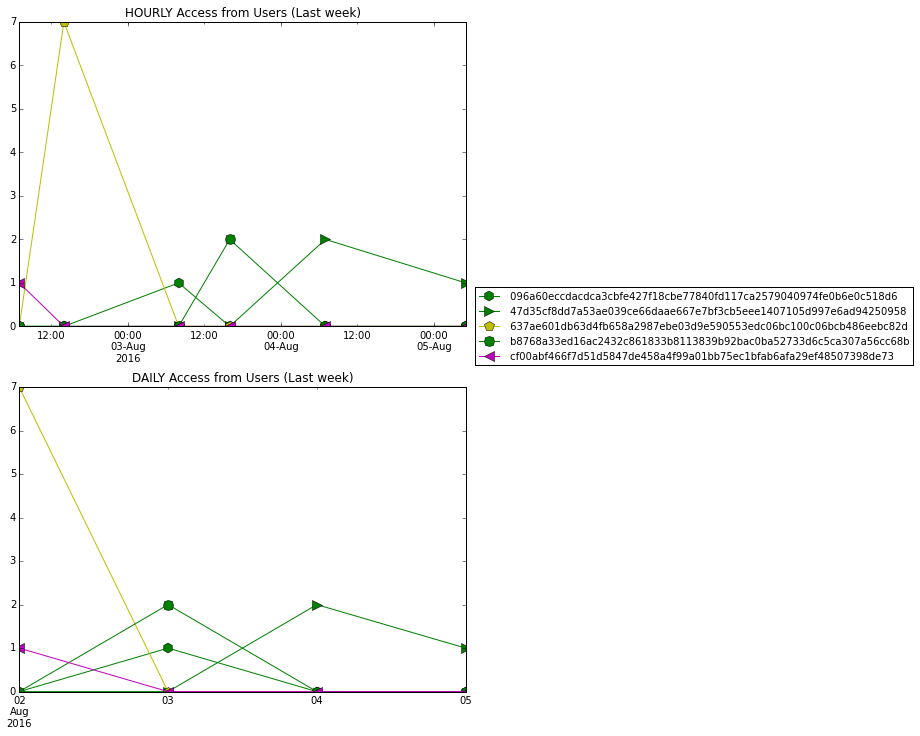

In [26]:
# CODE:

df_lastweek=indexed_df[lastweek:].reset_index()

users_lastweek_min = pd.pivot_table(df_lastweek[df_lastweek['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='H'), \
                    columns='client', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

users_lastweek = pd.pivot_table(df_lastweek[df_lastweek['recordtype']==' Q(Q)'],\
                    index=pd.Grouper(key='timestamp',freq='1D'), \
                    columns='client', \
                    values='unit', \
                    aggfunc=np.sum, \
                    fill_value=0)

fig = plt.figure(figsize=(8, 12))
ax1 = plt.subplot2grid((2,1), (0,0))
ax1 = users_lastweek_min.plot(ax=ax1, style=mystyle, title="HOURLY Access from Users (Last week)",markersize=10, legend=False)
ax1.legend(loc='center left',prop={'size':10},bbox_to_anchor=(1.01, 0),numpoints=1)
ax1.set_xlabel("")

# linestyle='--', marker='o', color='b'
ax2 = plt.subplot2grid((2,1), (1,0))
ax2 = users_lastweek.plot(ax=ax2, title="DAILY Access from Users (Last week)",style=mystyle, markersize=10,legend=False)
ax2.set_xlabel("")

#plotly.offline.iplot_mpl(fig)

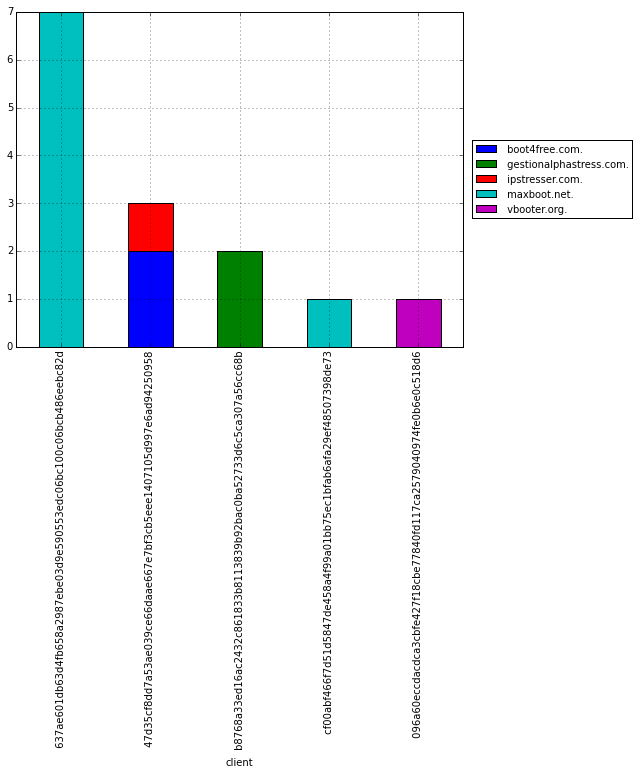

In [27]:
# CODE:

users_lastweek = pd.pivot_table(df_lastweek[df_lastweek['recordtype']==' Q(Q)'], index='client', columns='value', values='unit', aggfunc=np.sum, fill_value=0)

fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
users_lastweek.ix[users_lastweek_sorted].plot(kind='bar',ax=ax1, stacked=True, title="",grid=True)
ax1.legend(numpoints=1,bbox_to_anchor=(1.01, 0.5),loc='center left',prop={'size':10})


<div id="4"><h1><a href="#TOC">WANT TO JOIN US?</a></h1></div>


**If you want to collaborate** you can either use (1) the same approach as SURFnet or (2)propose your own approach. I don't mind to adapt my scripts accordingly to the data that you generate and send to us. The information that I ask you to provide is: (1) the timestamp, (2) the anonymized information of your client, (3) the booter they are willing to access, and (4) the IP address (DNS response) of the Booter website.
<br>
If you want to use the same approach as SURFnet you MUST TO (1) clone the repositorio https://github.com/SURFnet/eemo (2) install EEMO, (3) configure the dnsqrlog module to include the IPs that you want to listen and the Booter blacklist and (4) anonymize the data to send to us. Considering that steps 1 and 2 will be straightforward for you, lets focus on the last two steps. Although EEMO has some others interesting plugins we are only interested in the "dnsqrlog" (https://github.com/SURFnet/eemo/tree/master/src/plugins/dnsqrlog). Therefore for the configuration of the EEMO plugin you just need to create a ".conf" file into folder "config" that contains the configuration of module "dnsqrlog". There are some sample examples for you to take a look. See bellow an example for you!

```
...

modules:
{
        dnsqrlog:
        {
                lib = "/usr/local/lib/libeemo_dnsqrlog.so";

                modconf:
                {
                        #Add the IPs (v4 and v6) that you want to monitor
                        listen_ips = [ "192.168.0.0.1", "127.0.0.1", "255.255.255.255" ]; 
                           
                        #Add the Booter blacklist here
                        log_domains =
                        [
                                "absolut-stresser.net.",
                                "acidstresser.net.",
                                "agonyproducts.com.",
                                ...
                        ];

                log_file = "booter-queries.txt";
                };
        };
};

...
```
Note that you should change the "list_ips" accordingly to the IP address that you want to listen and the "log_domains" to include the booter blacklist. We are working on the automatic generation of the config file based on the Booter blacklist. We hope to solve this issue before the end of August 2016.
<br><br>
Finally, and **very important** you must to anonymize EEMO's output ("booter-queries.txt") before send to us! So, you can simply download the example in https://github.com/jjsantanna/IP_anonymization_by_Roland and run the C code.

# Contact me [j.j.santanna@utwente.nl](mailto:j.j.santanna@utwente.nl) and I will give you access to (1) our sFTP to tranfer your measurements and (2) the entire set of information given by others collaborators.

ssh -p8722
scp -P8722 "your_measurements_file" "your_user"@130.89.14.205:/home/"your_user"
sftp -P8722 "your_user"@130.89.14.205
